<a href="https://colab.research.google.com/github/khushiisaxena/Financial-Risk-Prediction-Using-Data-Engineering/blob/main/Financial_Risk_Prediction_Using_Data_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
print("Dataset Head:")
print(df.head())
print("\nDataset Description:")
print(df.describe())
print("\nClass Distribution:")
print(df['Class'].value_counts())

Dataset Head:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


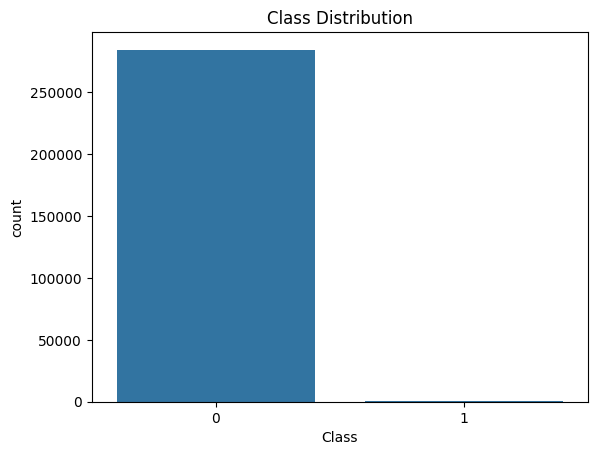

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

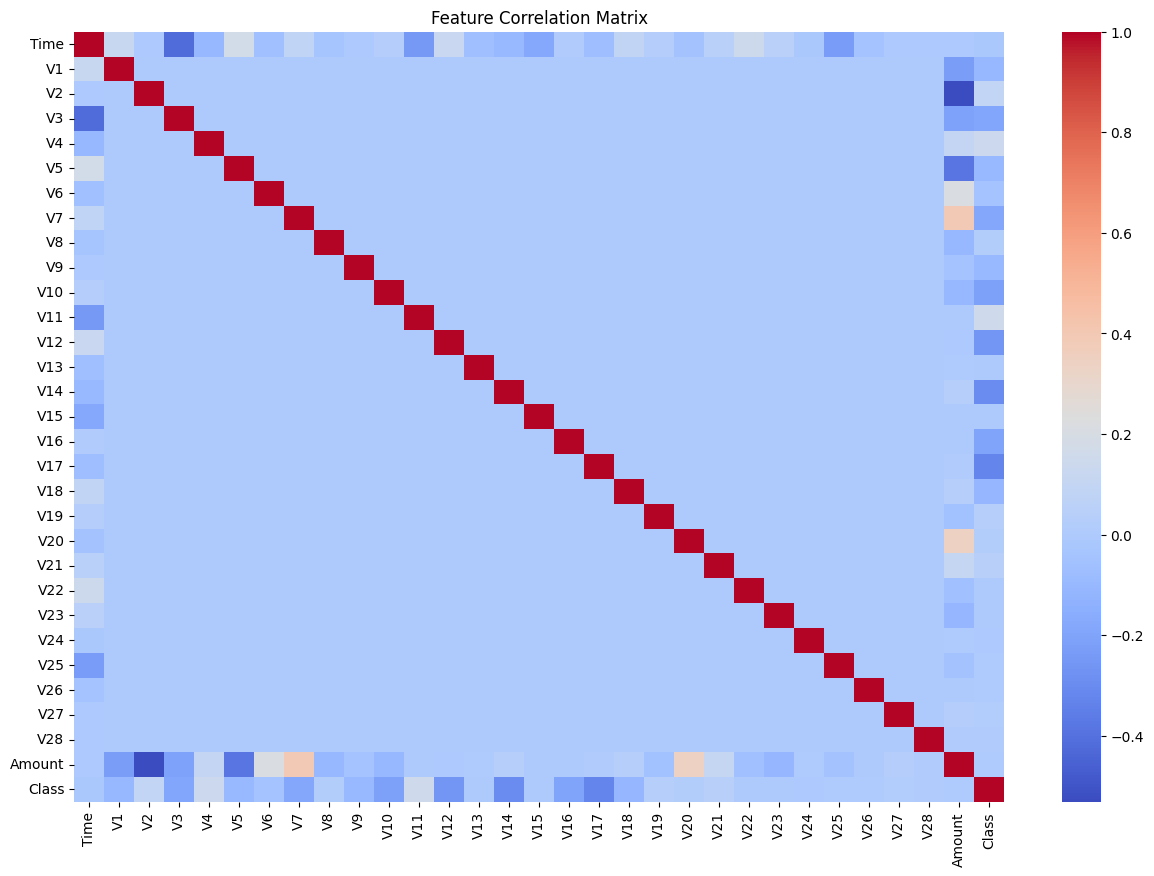

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

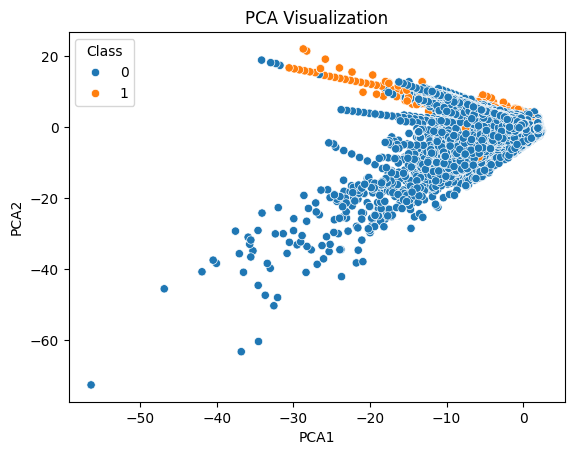

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(columns=['Class', 'Time', 'Amount']))
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=df) # Added data=df
plt.title("PCA Visualization")
plt.show()

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

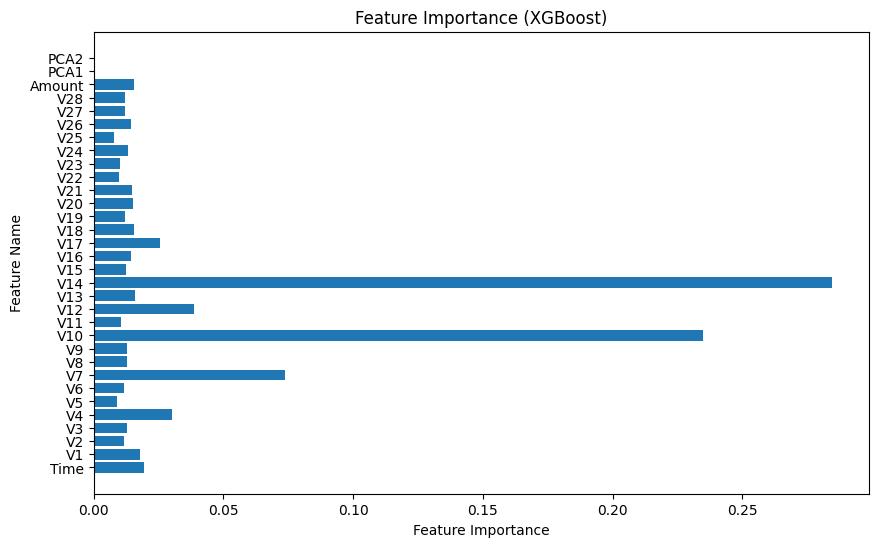

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt


model = xgb.XGBClassifier()
model.fit(X_train, y_train)


feature_importance = model.feature_importances_


feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance (XGBoost)")
plt.show()

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:")
print(Counter(y_train_resampled))

Class distribution after SMOTE:
Counter({0: 227451, 1: 227451})


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 score: ", f1_score(y_test, y_pred))
    return model

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    # "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_train_resampled, X_test, y_train_resampled, y_test)


Evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Accuracy Score: 0.9792317685474526
ROC AUC Score: 0.9437587570199717

Evaluating KNN...
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.02      0.53      0.03        98

    accuracy                           0.95     56962
   macro avg       0.51      0.74      0.50     56962
weighted avg       1.00      0.95      0.97     56962

Accuracy Score: 0.9462975316877918
ROC AUC Score: 0.7388130864332227

Evaluating Decision Tree...
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00   

In [ ]:
final_model = RandomForestClassifier()
final_model.fit(X_train_resampled, y_train_resampled)
y_pred_final = final_model.predict(X_test)

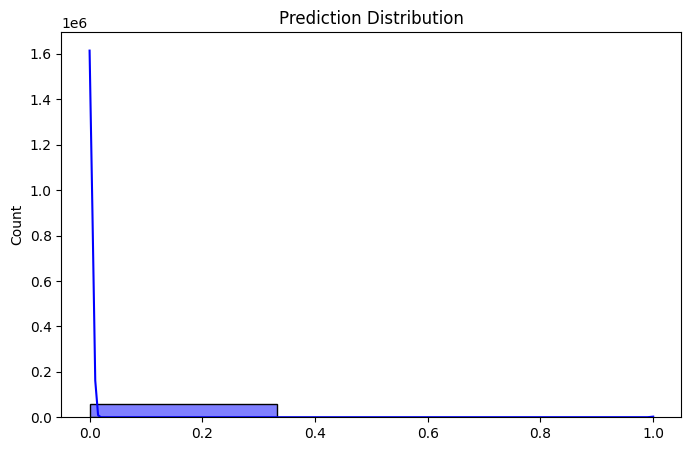

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(y_pred_final, kde=True, color='blue', bins=3)
plt.title("Prediction Distribution")
plt.show()

In [ ]:
print("Final Model Evaluation:")
print(classification_report(y_test, y_pred_final))

Final Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



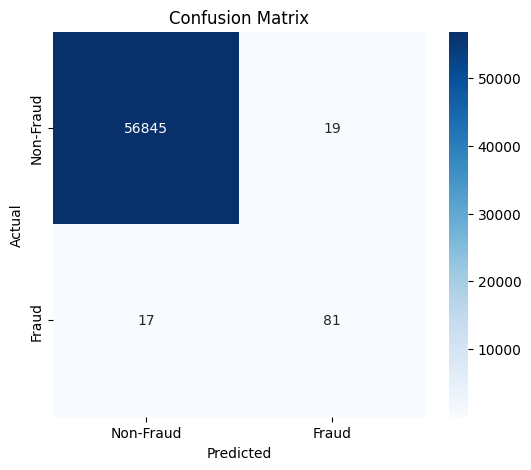

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

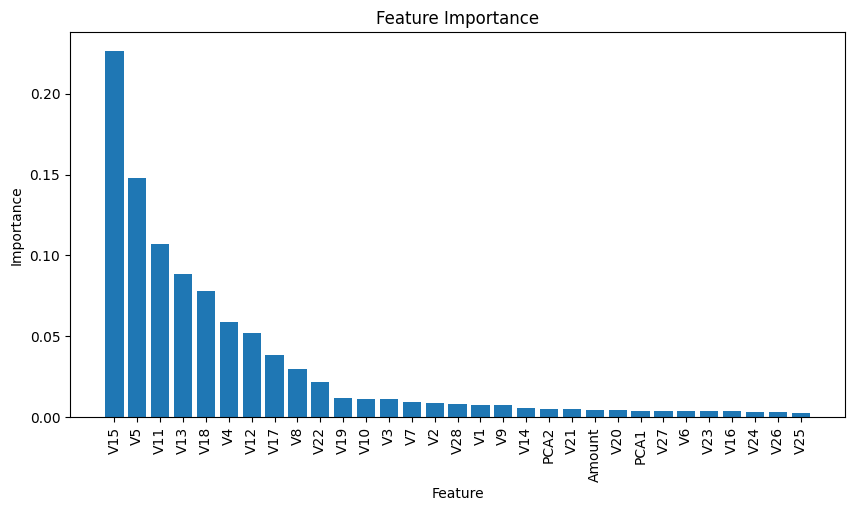

In [ ]:
importances = model.feature_importances_
columns = df.drop(columns=["Class", "Time"]).columns
indices = np.argsort(importances)[::-1]
indices = indices[indices < len(columns)]
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
sample_data = np.array([[0.5, -1.2, 1.3, 0.8, -0.5, 1.7, 0.2, 0.6, -0.9, 0.1, -1.0, 0.3, 0.7, -0.2, 1.5, -0.4, 0.1, -0.3, -1.2, 0.6, 0.2, 0.7, 0.9, -0.6, -0.3, -0.1, -0.05, -0.02, 200]])

In [ ]:
sample_data_with_zeros = np.concatenate([sample_data, np.zeros((sample_data.shape[0], 3))], axis=1)

In [ ]:
sample_data_scaled = scaler.transform(sample_data_with_zeros)
sample_prediction = model.predict(sample_data_scaled)
print(f"Sample Transaction Prediction: {'Fraud' if sample_prediction[0] == 1 else 'Non-Fraud'}")

Sample Transaction Prediction: Non-Fraud


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
